# Department of Education, Training and Employment (DETE) and Technical and Further Education (TAFE) Institute Exit Survey Analysis

In this project, we will be working with the exit surveys from employees of the Department of Education, Training and Employment(DETE) and the Technical and Further Education (TAFE) Institute in Queensland, Australia. The respective surveys can be found [here](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey) and [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey).

The questions we will be focusing on in this project are:
- Are employees who only worked for the institutes for a short period of time resigning due to dissatisfaction towards work? What about the employees who have been with the organisation longer?
- Are younger employees resigning due to dissatisfaction? What about the older employees?

In [1]:
# First we will be loading the dataframes
import pandas as pd
import numpy as np

#import DETE survey results
dete_survey = pd.read_csv('dete_survey.csv',encoding='utf8')

#import tafe survey results
tafe_survey = pd.read_csv('tafe_survey.csv',encoding='utf8')

In [2]:
# check features of dete survey data
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

In [3]:
dete_survey.shape

(822, 56)

In [4]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


We can tell there are a large amount of data missing in Classificaiton, Business Unit, and the last five columns for dete_survey. Let's first check to see if there are any obvious connections between these entries.

In [5]:
dete_survey['Classification'].value_counts(dropna = False)

NaN                  367
Primary              161
Secondary            124
A01-A04               66
AO5-AO7               46
Special Education     33
AO8 and Above         14
PO1-PO4                8
Middle                 3
Name: Classification, dtype: int64

In [6]:
dete_survey[dete_survey['Business Unit'].isnull()].head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN
6,7,Age Retirement,05/2012,1972,2007,Teacher,Secondary,Darling Downs South West,NaN,Permanent Part-time,...,D,D,SD,Female,56-60,NaN,NaN,NaN,NaN,NaN
7,8,Age Retirement,05/2012,1988,1990,Teacher Aide,NaN,North Coast,NaN,Permanent Part-time,...,SA,NaN,SA,Female,61 or older,NaN,NaN,NaN,NaN,NaN
8,9,Resignation-Other reasons,07/2012,2009,2009,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,A,D,N,Female,31-35,NaN,NaN,NaN,NaN,NaN


In [7]:
dete_survey['Job dissatisfaction'].value_counts(dropna = False)

False    733
True      89
Name: Job dissatisfaction, dtype: int64

In [8]:
dete_survey['Dissatisfaction with the department'].value_counts(dropna = False)

False    761
True      61
Name: Dissatisfaction with the department, dtype: int64

In [9]:
dete_survey[(dete_survey['Job dissatisfaction'] == True) |
            (dete_survey['Dissatisfaction with the department'] == True)].shape

(126, 56)

In [10]:
dete_survey.describe(include = 'all')

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
count,822.000000,822,822,822,822,817,455,822,126,817,...,813,766,793,798,811,16,3,7,23,32
unique,NaN,9,25,51,46,15,8,9,14,5,...,6,6,6,2,10,1,1,1,1,1
top,NaN,Age Retirement,2012,Not Stated,Not Stated,Teacher,Primary,Metropolitan,Education Queensland,Permanent Full-time,...,A,A,A,Female,61 or older,Yes,Yes,Yes,Yes,Yes
freq,NaN,285,344,73,98,324,161,135,54,434,...,401,253,386,573,222,16,3,7,23,32
mean,411.693431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,237.705820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,206.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,411.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,616.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There does not appear to be any discernable connection between the columns with missing data. Note for the last five columns (Aboriginal to NESB), NaN has been used as a substitute for the No answer - there is only one unique non-null value, Yes, in these columns. 

Columns 'DETE Start Date' and 'Role Start Date' use Not Stated instead of NaN to indicate response not received.

The dataframe also contain multiple columns that are not useful for answering our questions.

More than one eigth of the survey responses indicate resignations are caused by either job dissatisfaction or dissatisfacion towards the department.

We will now explore tafe_survey.

In [11]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

In [12]:
tafe_survey.shape

(702, 72)

In [13]:
tafe_survey.describe(include = 'all')

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
count,7.020000e+02,702,702,695.000000,701,437,437,437,437,437,...,594,587,586,581,596,596,596,596,596,596
unique,NaN,12,2,NaN,6,2,2,2,2,2,...,2,2,2,2,2,9,5,9,7,7
top,NaN,Brisbane North Institute of TAFE,Non-Delivery (corporate),NaN,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,Female,56 or older,Permanent Full-time,Administration (AO),Less than 1 year,Less than 1 year
freq,NaN,161,432,NaN,340,375,336,420,403,411,...,536,512,488,416,389,162,237,293,147,177
mean,6.346026e+17,NaN,NaN,2011.423022,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2.515071e+14,NaN,NaN,0.905977,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,6.341330e+17,NaN,NaN,2009.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,6.343954e+17,NaN,NaN,2011.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,6.345835e+17,NaN,NaN,2011.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,6.348005e+17,NaN,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
tafe_survey['Reason for ceasing employment'].value_counts(dropna = False)

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
NaN                           1
Name: Reason for ceasing employment, dtype: int64

In [15]:
tafe_survey['Contributing Factors. Dissatisfaction'].value_counts()

-                                         371
Contributing Factors. Dissatisfaction      66
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [16]:
tafe_survey['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      360
Job Dissatisfaction     77
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [17]:
tafe_survey[(tafe_survey['Contributing Factors. Dissatisfaction'] == 'Contributing Factors. Dissatisfaction') |
           (tafe_survey['Contributing Factors. Job Dissatisfaction'] == 'Job Dissatisfaction')].shape

(77, 72)

Approximately 10% of the respondents for the TAFE exit survey indicate they resigned because they were dissatisfied. Note approximately 1/3 of responses had missing data in the Job Dissatisfaction column.

The dataframes dete_survey and tafe_survey both contain extra data columns that we do not need for our analysis. Each dataframe contains many similar columns but the column names are slightly different (e.g. 'Job Dissatisfaction' in dete_survey and 'Contributing Factors. Job Dissatisfaciton' in tafe_survey). There are also multiple columns presents in both dataframes indicating the resignation is caused by dissatisfaction.

Firstly we will reload the dete_survey data to ensure the Not Stated values are loaded as NaN correctly.

In [18]:
dete_survey = pd.read_csv('dete_survey.csv', encoding = 'utf8', na_values = 'Not Stated')

In [19]:
dete_survey.describe(include = 'all')

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
count,822.000000,822,788,749.000000,724.000000,817,455,717,126,817,...,813,766,793,798,811,16,3,7,23,32
unique,NaN,9,24,NaN,NaN,15,8,8,14,5,...,6,6,6,2,10,1,1,1,1,1
top,NaN,Age Retirement,2012,NaN,NaN,Teacher,Primary,Metropolitan,Education Queensland,Permanent Full-time,...,A,A,A,Female,61 or older,Yes,Yes,Yes,Yes,Yes
freq,NaN,285,344,NaN,NaN,324,161,135,54,434,...,401,253,386,573,222,16,3,7,23,32
mean,411.693431,NaN,NaN,1994.182911,1998.955801,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,237.705820,NaN,NaN,13.880503,67.792281,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,1963.000000,200.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,206.250000,NaN,NaN,1982.000000,1995.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,411.500000,NaN,NaN,1996.000000,2005.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,616.750000,NaN,NaN,2007.000000,2010.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Recall we are only interested in the characteristics of the employees who have ceasesed working for the organisation due to dissatisfaction.

In [20]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis = 1)

In [21]:
dete_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             788 non-null object
DETE Start Date                        749 non-null float64
Role Start Date                        724 non-null float64
Position                               817 non-null object
Classification                         455 non-null object
Region                                 717 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work envir

We will now drop columns of tafe_survey that contribute little to our analysis.

In [22]:
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis = 1)

In [23]:
tafe_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 23 columns):
Record ID                                                                    702 non-null float64
Institute                                                                    702 non-null object
WorkArea                                                                     702 non-null object
CESSATION YEAR                                                               695 non-null float64
Reason for ceasing employment                                                701 non-null object
Contributing Factors. Career Move - Public Sector                            437 non-null object
Contributing Factors. Career Move - Private Sector                           437 non-null object
Contributing Factors. Career Move - Self-employment                          437 non-null object
Contributing Factors. Ill Health                                             437 non-null object
Contributing Factors

We will now continue dropping a few more columns from each dataframe that we weren't able to previously via bulk removal.

In [24]:
dete_survey_col_analysis = ['ID', 'SeparationType', 'Cease Date', 'DETE Start Date', 'Age', 'Gender']
dete_survey_focus = dete_survey_updated[dete_survey_col_analysis]

The new dataframe dete_survey_updated includes columns that describe the characteristics of the employees and the nature/cause of their termination.

In [25]:
dete_survey_focus.head()

,ID,SeparationType,Cease Date,DETE Start Date,Age,Gender
0,1,Ill Health Retirement,08/2012,1984.0,56-60,Male
1,2,Voluntary Early Retirement (VER),08/2012,NaN,56-60,Male
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,61 or older,Male
3,4,Resignation-Other reasons,05/2012,2005.0,36-40,Female
4,5,Age Retirement,05/2012,1970.0,61 or older,Female


In [26]:
tafe_survey_col_analysis = ['Record ID','Reason for ceasing employment','CESSATION YEAR','LengthofServiceOverall. Overall Length of Service at Institute (in years)','LengthofServiceCurrent. Length of Service at current workplace (in years)','CurrentAge. Current Age','Gender. What is your Gender?']
tafe_survey_focus = tafe_survey_updated[tafe_survey_col_analysis]

In [27]:
tafe_survey_focus.head()

,Record ID,Reason for ceasing employment,CESSATION YEAR,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years),CurrentAge. Current Age,Gender. What is your Gender?
0,6.341330e+17,Contract Expired,2010.0,1-2,1-2,26 30,Female
1,6.341337e+17,Retirement,2010.0,NaN,NaN,NaN,NaN
2,6.341388e+17,Retirement,2010.0,NaN,NaN,NaN,NaN
3,6.341399e+17,Resignation,2010.0,NaN,NaN,NaN,NaN
4,6.341466e+17,Resignation,2010.0,3-4,3-4,41 45,Male


Eventually we would like to combine both dataframes for analysis. It is therefore crucial to identify the exact columns that we want to focus on. 

We will begin standardising the columns.

In [28]:
dete_survey_updated.columns = dete_survey_updated.columns.str.strip().str.replace(' ','_').str.lower()

In [29]:
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [30]:
tafe_survey_updated.columns

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender. What is your Gender?', 'CurrentAge. Current Age',
       'Employment Type. Employment Type', 'Classification. Classification',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)'],
      dtype='ob

In [31]:
#using mapping to rename columns of the tafe_survey_updated dataframe
#such they are in line with the corresponding columns in dete_survey_updated
tafe_rename_map = {'Record ID':'id',
                  'CESSATION YEAR':'cease_date',
                  'Reason for ceasing employment':'separationtype',
                  'Gender. What is your Gender?':'gender',
                  'CurrentAge. Current Age':'age',
                  'Employment Type. Employment Type':'employment_status',
                  'Classification. Classification':'position',
                  'LengthofServiceOverall. Overall Length of Service at Institute (in years)':'institute_service',
                  'LengthofServiceCurrent. Length of Service at current workplace (in years)':'role_service'}

In [32]:
tafe_survey_updated = tafe_survey_updated.rename(columns = tafe_rename_map)

In [33]:
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

We will continue cleaning the dataframes by removing the rows of data that we do not need.

As we are only interested in the characteristics of the employees who have *resigned*, we can drop the employees who have ceased work due to other reasons. We will explroe the unique entries in the separationtype column for both dataframes.

In [34]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [35]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [36]:
dete_resignations = dete_survey_updated.loc[(dete_survey_updated['separationtype']=='Resignation-Other reasons') |
                                           (dete_survey_updated['separationtype']=='Resignation-Other employer') |
                                           (dete_survey_updated['separationtype']=='Resignation-Move overseas/interstate'),:].copy()
# Note we have added.copy() at the end to avoid potential SettingWithCopy errors.

In [37]:
tafe_resignations = tafe_survey_updated.loc[(tafe_survey_updated['separationtype']=='Resignation'),:].copy()

Before we continue data cleaning and manipulation, let's verify that our existing data doesn't contain any major inconsistencies. This enables us to avoid completing a data analysis project that ends up being useless due to corrupted data. One of the ways is to verify the years in the cease_date and dete_start_date make logical sense:

- cease_date should be after dete_start_date as that is when the person has resigned from the position. In addition, neither of these dates should be after the current date.
- The dataset was last updated in 2019. It is highly unlikely for anyone to have a dete_start_date before 1930.

Beginning with the dete_resignation dataframe, we will firstly check the cease_date column.

In [38]:
dete_resignations.cease_date.value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
07/2006      1
09/2010      1
07/2012      1
2010         1
Name: cease_date, dtype: int64

The years are in the four digit format - we will use a regular expression to capture this.

In [39]:
dete_cease_year = dete_resignations['cease_date'].str.extract(r"(?P<cease_year>[1-2][0-9]{3})",expand = True)

In [40]:
dete_cease_year.cease_year = dete_cease_year.cease_year.astype('float64')

In [41]:
dete_cease_year.cease_year.value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_year, dtype: int64

In [42]:
dete_start_year = dete_resignations.loc[:,['dete_start_date']]

In [43]:
dete_start_year.head()

,dete_start_date
3,2005.0
5,1994.0
8,2009.0
9,1997.0
11,2009.0


Merging the two dataframes together using outer type.

In [44]:
dete_start_finish = pd.merge(left = dete_start_year, right = dete_cease_year,
                            left_index = True, right_index = True, how = 'outer')

In [45]:
dete_start_finish[dete_start_finish.dete_start_date>dete_start_finish.cease_year].shape

(0, 2)

In [46]:
(dete_start_finish.cease_year > 2019).sum()

0

In [47]:
(dete_start_finish.dete_start_date <= 1930).sum()

0

We can tell from the above cells that there is no abnormal start/cease years for dete_resignations dataframe. In addition, there isn't any start year before 1930. For the purpose of our analysis, dete_resignations dataframe appears to be normal.

In [48]:
(tafe_resignations.cease_date > 2019).sum()

0

tafe_resignations dataframe does not contain a start date/year column. The employee start year will need to be deduced from the length of their service in the institute and/or in this role.

In [49]:
tafe_resignations.institute_service.value_counts(dropna = False)

Less than 1 year      73
1-2                   64
3-4                   63
NaN                   50
5-6                   33
11-20                 26
7-10                  21
More than 20 years    10
Name: institute_service, dtype: int64

In [50]:
tafe_resignations.role_service.value_counts(dropna = False)

Less than 1 year      92
1-2                   74
3-4                   54
NaN                   50
5-6                   22
11-20                 21
7-10                  19
More than 20 years     8
Name: role_service, dtype: int64

tafe_resignations dataframe is also suitable for further analysis.

We would like to investigate:
- Are employees who only worked for the institutes for a short period of time resigning due to dissatisfaction towards work? What about the employees who have been with the organisation longer?

tafe_resignations dataframe already contains institute_service column. Similarly, we will add a institute_service column to dete_resignations.

In [51]:
dete_resignations['institute_service'] = dete_start_finish.cease_year - dete_start_finish.dete_start_date

In [52]:
dete_resignations.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0
5,6,Resignation-Other reasons,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0
8,9,Resignation-Other reasons,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0
9,10,Resignation-Other employer,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0
11,12,Resignation-Move overseas/interstate,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0


We will next identify the employees who have resigned because they were dissatisfied.

For *dete_survey*, we define the resignation as dissatisfaction related if it is attributed to any of the following:

- Job dissatisfaction
- Dissatisfaction with the department
- Physical work environment
- Lack of recognition
- Lack of job security
- Work location
- Employment conditions
- Work life balance
- Workload

For *tafe_survey*,  we define the resignation as dissatisfaction related if it is attributed to either of the following:

- Contributing Factors. Dissatisfaction
- Contributing Factors. Job Dissatisfaction

In [53]:
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [54]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna = False)

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [55]:
def update_vals(element):
    if pd.isnull(element):
        return np.nan
    elif element == "-":
        return False
    else:
        return True # we have confirmed in the cell above there are only three unique entries

In [56]:
tafe_resignations['Contributing Factors. Dissatisfaction'] = tafe_resignations['Contributing Factors. Dissatisfaction'].map(update_vals)

In [57]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna = False)

False    277
True      55
NaN        8
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [58]:
tafe_resignations.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

In [59]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'] = tafe_resignations['Contributing Factors. Job Dissatisfaction'].map(update_vals)

Entries in the *Contributing Factors. Dissatisfaction* and *Contributing Factors. Job Dissatisfactoin* have now been classified into True, False, and NaN. We want to identify the persons who have resigned with True in either Dissatisfaction or Job Dissatisfaction column - this will be achieved by using df.any() method.

In [60]:
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].any(axis=1,skipna = False)

In [61]:
tafe_resignations.dissatisfied.value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

We will now add a *dissatisfied* column to dete_resignations as well.

In [62]:
dete_dissatisfied_cols = ['job_dissatisfaction', 'dissatisfaction_with_the_department',
                         'physical_work_environment','lack_of_recognition',
                         'lack_of_job_security', 'work_location','employment_conditions',
                         'work_life_balance','workload']

In [63]:
dete_dissatisfied_cause = dete_resignations[dete_dissatisfied_cols]

In [64]:
dete_dissatisfied_cause.apply(pd.value_counts,dropna = False)

,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,work_life_balance,workload
False,270,282,305,278,297,293,288,243,284
True,41,29,6,33,14,18,23,68,27


Checking all the unique values in the columns indicating dissatisfaction related resignations. The values are already in True/False format and therefore should not require further modification prior to applying df.any() method.

In [65]:
dete_resignations['dissatisfied'] = dete_dissatisfied_cause.any(axis = 1,skipna = False)

In [66]:
dete_resignations.dissatisfied.value_counts()

False    162
True     149
Name: dissatisfied, dtype: int64

Both *tafe_resignaitons* and *dete_resignations* now contain a *dissatisfied* column. We will now clean the dataframes to remove redundant columns.

In [67]:
tafe_resignations.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service', 'dissatisfied'],
      dtype='object')

In [68]:
dete_cols = ['id', 'cease_date', 'separationtype',
       'gender', 'age','institute_service','dissatisfied']
dete_resignations = dete_resignations[dete_cols]

In [69]:
tafe_cols = ['id','cease_date','separationtype','gender','age','institute_service','dissatisfied']
tafe_resignations = tafe_resignations[tafe_cols]

In [70]:
tafe_resignations.shape[1] == dete_resignations.shape[1]

True

We will now make copies of the cleaned dataframes and add an additional column to *dete_resignations* and *tafe_resignations* respectively to note the origin of the row data.

In [71]:
dete_resignations_up = dete_resignations.copy()
tafe_resignations_up = tafe_resignations.copy()

In [72]:
dete_resignations_up['institute'] = 'DETE'

In [73]:
tafe_resignations_up['institute'] = 'TAFE'

Combine the cleaned data.

In [74]:
combined_updated = pd.concat([dete_resignations_up,tafe_resignations_up],axis=0)

With the combined dataframe, we will clean up the institute_service column so it can be analysed. We will examine the column first.

In [75]:
combined_updated.institute_service.value_counts(dropna = False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
15.0                   7
20.0                   7
14.0                   6
12.0                   6
17.0                   6
22.0                   6
10.0                   6
16.0                   5
18.0                   5
11.0                   4
23.0                   4
24.0                   4
19.0                   3
32.0                   3
39.0                   3
21.0                   3
28.0                   2
30.0                   2
26.0                   2
36.0                   2
25.0                   2


To analyse the data, we will convert these numbers into defined categories. An [article](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage) published on Business Wire provides some insight into the employee's needs based on their career stages. We will create a few categories using the slightly mofied definitions below:
- New: <3 years at a company;
- Experienced: 3-6 years at a company;
- Established: 7-10 years at a company;
- Veteran: 11 or more years at a company.

We will firstly extract the years of service from each entry in the *institute_service* column.

Employee's years of services at the institute is expressed in four different formats:
1. Float - these can be processed directly. We just need to make sure they are of data type float.
2. Range (e.g. 1-2) in String - these are stored as strings in the dataframe. We will convert these to the mean of the respective ranges.
3. Text strings (e.g. Less than 1 year) - there are only two unique values for string-type entries. We will be converting them to 1 year and 20 years respectively.
4. NaN - these will be kept the same.

In [76]:
def float_conv(element):
    import re
    
    # check if the value is NaN first
    if pd.isnull(element):
        return np.nan
    
    # return float elements as is
    elif type(element) == float:
        return element
    
    # extract means for range in string
    elif '-' in element:
        first_num, second_num = map(float, element.split('-'))
        return np.mean([first_num, second_num])
    
    # extracting float from text strings. 
    # note we already know there is only one number each text string entry.
    else:
        num = float(re.findall(r'\d+',element)[0])
        return num

In [77]:
combined_updated.institute_service = combined_updated.institute_service.map(float_conv)

In [78]:
combined_updated.head()

,id,cease_date,separationtype,gender,age,institute_service,dissatisfied,institute
3,4.0,05/2012,Resignation-Other reasons,Female,36-40,7.0,False,DETE
5,6.0,05/2012,Resignation-Other reasons,Female,41-45,18.0,True,DETE
8,9.0,07/2012,Resignation-Other reasons,Female,31-35,3.0,False,DETE
9,10.0,2012,Resignation-Other employer,Female,46-50,15.0,True,DETE
11,12.0,2012,Resignation-Move overseas/interstate,Male,31-35,3.0,False,DETE


We can now map each value to one of the career stages defined above.

In [79]:
def career_stg_sort(institute_service):
    if pd.isnull(institute_service):
        return np.nan    
    elif institute_service < 3:
        return "New"
    elif institute_service < 7:
        return "Experienced"
    elif institute_service < 10:
        return "Established"
    else:
        return "Veteran"

In [80]:
combined_updated['service_cat'] = combined_updated['institute_service'].map(career_stg_sort)

In [81]:
combined_updated.service_cat.value_counts(dropna = False)

New            193
Experienced    172
Veteran        142
NaN             88
Established     56
Name: service_cat, dtype: int64

In [82]:
combined_updated.head()

,id,cease_date,separationtype,gender,age,institute_service,dissatisfied,institute,service_cat
3,4.0,05/2012,Resignation-Other reasons,Female,36-40,7.0,False,DETE,Established
5,6.0,05/2012,Resignation-Other reasons,Female,41-45,18.0,True,DETE,Veteran
8,9.0,07/2012,Resignation-Other reasons,Female,31-35,3.0,False,DETE,Experienced
9,10.0,2012,Resignation-Other employer,Female,46-50,15.0,True,DETE,Veteran
11,12.0,2012,Resignation-Move overseas/interstate,Male,31-35,3.0,False,DETE,Experienced


Both *service_cat* and *dissatified* columns still have NaN entries. We will exclude the NaN entries in the *service_cat* column as there is no reliable way to interpolate the data for these missing entries reliably. We will replace the missing values in the *dissatisfied* column with the value that occurs most frequently in the column, either True or False. 

In [83]:
combined_updated.dissatisfied.value_counts(dropna = False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [84]:
combined_updated.dissatisfied = combined_updated.dissatisfied.fillna(False)

We will create a pivot table to calculate the percentage of dissatisfied employees in each *service_cat* group.

In [85]:
combined_updated.head()

,id,cease_date,separationtype,gender,age,institute_service,dissatisfied,institute,service_cat
3,4.0,05/2012,Resignation-Other reasons,Female,36-40,7.0,False,DETE,Established
5,6.0,05/2012,Resignation-Other reasons,Female,41-45,18.0,True,DETE,Veteran
8,9.0,07/2012,Resignation-Other reasons,Female,31-35,3.0,False,DETE,Experienced
9,10.0,2012,Resignation-Other employer,Female,46-50,15.0,True,DETE,Veteran
11,12.0,2012,Resignation-Move overseas/interstate,Male,31-35,3.0,False,DETE,Experienced


In [86]:
# True and False are interpreted as 1 and 0 respectively by df.pivot_table
# without specifying the aggfunc, the default function applied is mean()
# this pivot table provides the percentage of employees in each career category
# who has resigned due to dissatisfaction.
combined_pvt = combined_updated.pivot_table(index = 'service_cat', values = 'dissatisfied')

In [87]:
combined_pvt = combined_pvt.sort_values('dissatisfied', ascending = False)

In [88]:
combined_pvt

,dissatisfied
service_cat,
Established,0.553571
Veteran,0.471831
Experienced,0.343023
New,0.295337


In [89]:
%matplotlib inline

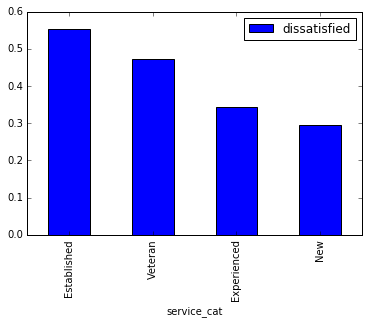

In [90]:
combined_pvt.plot(kind = 'bar')

By analysing the exit survey results from DETE and TAFE, we can see that Established employees (7-10 years at the company) hold the highest percentage of dissatisfaction related resignations at 55.4%, followed by Veterans (11 or more years) and Experienced (3-6 years) at 47.1% and 34.3% respectively. The New employees (less than 3 years at the compnay) are least likely to resign due to dissatisfaction - only 29.5% of the New employee resignations are attributed to being dissatisfied.

Next, we will examine the age distribution of the employees who have resigned due to some form of dissatisfaction.

In [97]:
combined_updated.age.value_counts(dropna = False)

51-55            71
NaN              55
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
36  40           32
26  30           32
31  35           32
56 or older      29
31-35            29
21-25            29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

Employee ages are expressed in four different formats:

1. Range (e.g. 51-55) with limits separated by dashes - we will convert these to the mean of the respective ranges.
2. Range (e.g. 41  45) with limits separated by two spaces - we will convert these to the mean of the respective ranges.
3. Text strings (e.g. 56 or older, 20 or younger) - these will be converted into their corresponding floor/ceiling values respectively.
4. NaN - these will be kept the same.

In [100]:
def age_conv(element):
    import re
    
    #check if the element is NaN
    if pd.isnull(element):
        return np.nan
    #check if the element contains - symbol
    elif '-' in element:
        first_num, second_num = map(float, element.split('-'))
        return np.mean([first_num, second_num])
    #check if the element contains or
    elif 'or' in element:
        return float(re.findall(r'\d+',element)[0])
    #leftover elements should all contain one space as the delimiter
    #split() will correctly split the string by delimiter even with double spaces
    else:
        first_num, second_num = map(float,element.split())
        return np.mean([first_num,second_num])

In [104]:
combined_updated.age = combined_updated.age.map(age_conv)
combined_updated.age.value_counts(dropna = False)

 43.0    93
 48.0    81
 38.0    73
 53.0    71
 28.0    67
 23.0    62
 33.0    61
NaN      55
 56.0    29
 58.0    26
 61.0    23
 20.0    10
Name: age, dtype: int64

We will split the age groups into five categories:

- 20 and below;
- 20 to 30;
- 30 to 40;
- 40 to 50;
- 50 and above.

The above categories are all upper limit inclusive.

In [106]:
def age_sort(age):
    if pd.isnull(age):
        return np.nan
    elif age <= 20:
        return '20 and below'
    elif age <= 30:
        return "20 to 30"
    elif age <= 40:
        return "30 to 40"
    elif age <= 50:
        return "40 to 50"
    else:
        return "50 and above"

Similar to before, we are not filling the NaN 

In [107]:
combined_updated['age_cat'] = combined_updated.age.map(age_sort)

In [110]:
combined_updated.age_cat.value_counts(dropna = False)

40 to 50        174
50 and above    149
30 to 40        134
20 to 30        129
NaN              55
20 and below     10
Name: age_cat, dtype: int64

Similar to when we were analysing the *service_cat* column, the missing entries under the age column will be excluded from the analysis due to the lack of reliable means to fill these entries at this time. At a later revision of the data analysis, the employee IDs may be crossreferenced with TAFE/DETE's internal register(if available) to clarify the employee ages.

In [112]:
age_pvt = combined_updated.pivot_table(index = 'age_cat', values = 'dissatisfied')

In [113]:
age_pvt

,dissatisfied
age_cat,
20 and below,0.200000
20 to 30,0.364341
30 to 40,0.358209
40 to 50,0.379310
50 and above,0.422819


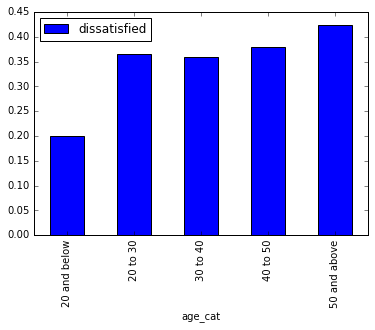

In [114]:
age_pvt.plot(kind = 'bar')

Older employees are more likely to resign due to dissatisfaction as opposed to other factors. The above graph shows that only 20% of the resignations from the employees who are 20 and below are from some kind of dissatisfaction. However, it becomes a more prominent cause for resignation among employees that are 20 to 50 years old (35.8 ~ 37.9%). For the age group of 50 and above, 42.3% of the resignations are attributed to dissatisfaction.